In [1]:
import pandas as pd
import numpy as np
import math
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14,14)

## Regression Trees

Trees can also perform regressions in addition to decisions. Using the regression tree models is pretty straightforward and very similar to any other model like linear regression. The regression tree itself is mostly similar to the decision tree, the primary difference is that both the outcomes and the error metrics are adapted to numerical values. 

In [10]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(sklearn.datasets.load_boston())

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
#Generate Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
clf = DecisionTreeRegressor()
pipe_steps = [('scaler', StandardScaler()), ('model', clf)]
pipe = Pipeline(pipe_steps)
df2 = pd.get_dummies(df, drop_first=True)
y = np.array(df2["target"]).reshape(-1,1)
X = np.array(df2.drop(columns={"target"}))

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe.fit(X_train, y_train)
#print(clf.get_depth())
print(pipe.score(X_test, y_test))

0.7672361411782381


### Regression Tree Decision Making

The regression tree works very similarly to the decision tree. The key differences are:
<ul>
<li>Instead of producing a classification at the end, it produces an average of all the values in that group. That average is the prediction for anything that falls into that leaf on the tree. 
<li>Instead of using the information gain concept that decision trees do, a regression tree tries to minimize error when splitting, normally MSE. So the algorithm seeks splits that have the lowest average error between the error and the values.
</ul>

Just like decision trees, there are a few options that we can set as HP - one of those being the error metric. We can choose absolute error or a couple of others for the error metric; we can also set limits to growth like depth and min_split_size. 

#### Tree Weakness

One specific weakness with regression trees is that they don't "extend" like a linear regression, they're bounded by whatever data they have. So if the maximum prediction that is generated in training is 50, no matter what future inputs look like it will never be able to predict beyond that. We can see this if we chart an example, there isn't a nice smooth prediction curve like a linear regression, we get blocky steps.

![Regression Tree](images/regtree2.png "Regression Tree" )

### Use a Grid Search to Improve

We can also utilize a grid search to do some HP tuning. Along with some other options we can try different error metrics, I just copied the entire list from the sklearn page. Note that the names for absolute and squared error are changing, so depending on the specific version of sklearn you have installed you might need to use absolute_error/squared_error or mae/mse, the meaning is the same, they just changed the label to be more descriptive. 

In [4]:
tree_para = {'min_samples_split':[2,3,4,5,6,7,8,9,10],
            'max_depth':[7,8,9,10,11,12,13,14,15,16], 
            'criterion':["friedman_mse", "poisson", "mse", "mae"]}

clfCV = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=tree_para, cv=10) #See below for the CV argument
clfCV.fit(X_train, y_train)
clfCV.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                      min_samples_split=10)

Use the optimal combo from above and create a new model. We could have also grabbed the best from above. The attribute "best_estimator_" is the most accurate model. 

0.6697483964146421


[Text(494.04279661016955, 713.4749999999999, 'X[5] <= 6.803\nmse = 82.145\nsamples = 379\nvalue = 22.598'),
 Text(286.32966101694916, 618.345, 'X[12] <= 14.405\nmse = 36.534\nsamples = 312\nvalue = 19.738'),
 Text(135.71694915254238, 523.2149999999999, 'X[7] <= 1.434\nmse = 23.679\nsamples = 188\nvalue = 22.929'),
 Text(122.47627118644068, 428.085, 'mse = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(148.95762711864407, 428.085, 'X[5] <= 6.544\nmse = 11.892\nsamples = 184\nvalue = 22.461'),
 Text(72.82372881355933, 332.955, 'X[12] <= 7.76\nmse = 6.972\nsamples = 151\nvalue = 21.487'),
 Text(26.481355932203392, 237.82500000000005, 'X[9] <= 222.5\nmse = 3.245\nsamples = 39\nvalue = 23.795'),
 Text(13.240677966101696, 142.69499999999994, 'mse = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(39.722033898305085, 142.69499999999994, 'X[7] <= 4.464\nmse = 2.68\nsamples = 38\nvalue = 23.666'),
 Text(26.481355932203392, 47.565000000000055, 'mse = 3.684\nsamples = 9\nvalue = 25.0'),
 Text(52.96271186440

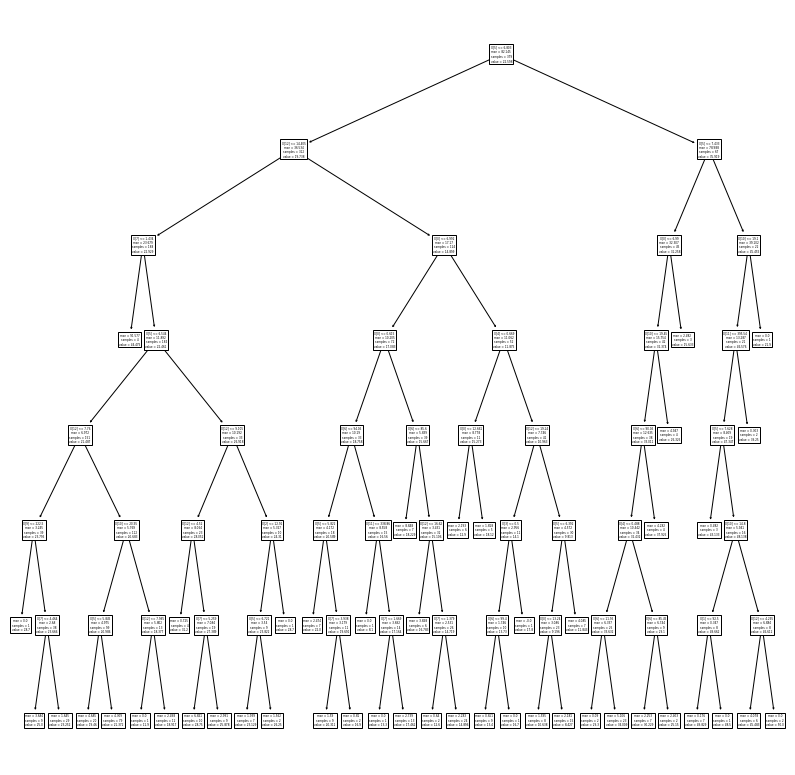

In [5]:
clf2 = DecisionTreeRegressor(max_depth=7, min_samples_split=8)
clf2 = clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))
plot_tree(clf2)

### Regression Predictions

We can look at the predictions made by the tree (limit the tree size to make the chart above and the results obvious). Predictions are only at the results of one of the terminal leafs, we don't get a curve like a linear regression. 

<AxesSubplot:ylabel='Count'>

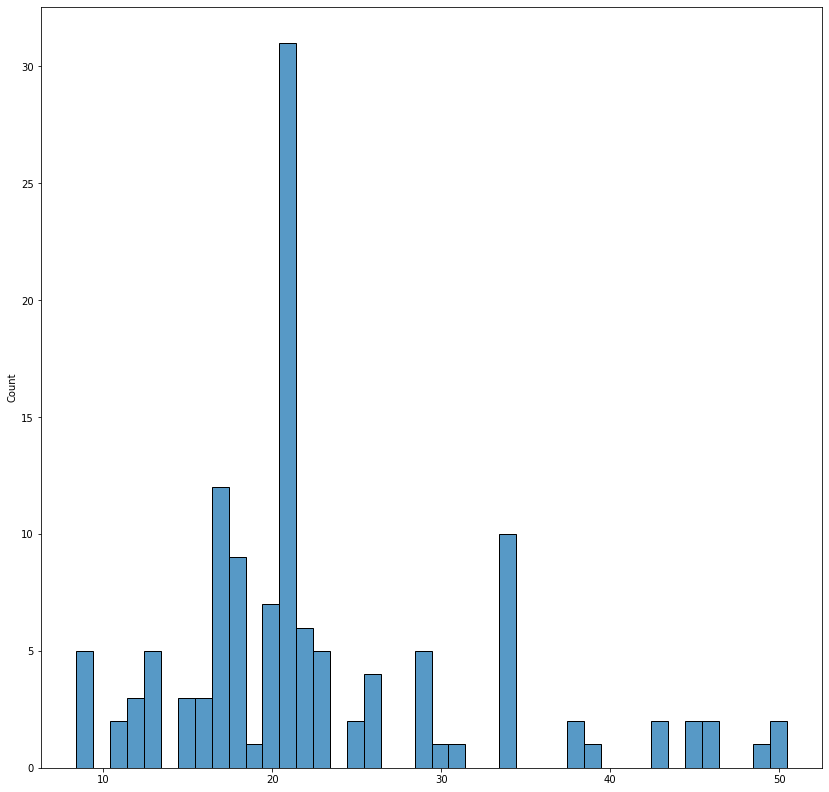

In [6]:
preds = clf2.predict(X_test)
sns.histplot(preds, binwidth=1)

## Worked Example, with a Forest

Use a forest, pipeline, and gridsearchCV to predict the bodyfat. 

In [7]:
#Load data
df_ = pd.read_csv("data/bodyfat.csv")
